In [ ]:
!pip install pmdarima

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm

warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import date
from statsmodels.tsa.seasonal import seasonal_decompose, STL

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

Preprocessing Part

In [ ]:
start_date ='2014-09-17'
end_date = '2024-12-12'
#end_date = datetime.datetime.now().date()

In [ ]:
def creating_features(data):
  data = data.copy()
  data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]
  data = data.filter(regex='^Close')
  #data['Date'] = data.index.date
  #data['Date'] = pd.to_datetime(data['Date'])
  return data

In [ ]:
#Features_agglomorated
tickers = ['GC=F','BTC-USD']

# Download historical data
features = yf.download(tickers, start= start_date, end=end_date, interval='1d')
#features = yf.download(tickers, end=end_date, interval='1d')

[*********************100%***********************]  2 of 2 completed


In [ ]:
features.head(10)

Price        Adj Close                    Close                     High  \
Ticker         BTC-USD         GC=F     BTC-USD         GC=F     BTC-USD   
Date                                                                       
2014-09-17  457.334015  1234.400024  457.334015  1234.400024  468.174011   
2014-09-18  424.440002  1225.699951  424.440002  1225.699951  456.859985   
2014-09-19  394.795990  1215.300049  394.795990  1215.300049  427.834991   
2014-09-20  408.903992          NaN  408.903992          NaN  423.295990   
2014-09-21  398.821014          NaN  398.821014          NaN  412.425995   
2014-09-22  402.152008  1216.800049  402.152008  1216.800049  406.915985   
2014-09-23  435.790985  1221.000000  435.790985  1221.000000  441.557007   
2014-09-24  423.204987  1218.599976  423.204987  1218.599976  436.112000   
2014-09-25  411.574005  1221.199951  411.574005  1221.199951  423.519989   
2014-09-26  404.424988  1214.099976  404.424988  1214.099976  414.937988   

Price                           Low                     Open               \
Ticker             GC=F     BTC-USD         GC=F     BTC-USD         GC=F   
Date                                                                        
2014-09-17  1236.199951  452.421997  1221.900024  465.864014  1236.199951   
2014-09-18  1225.699951  413.104004  1216.199951  456.859985  1216.199951   
2014-09-19  1218.300049  384.532013  1215.300049  424.102997  1218.300049   
2014-09-20          NaN  389.882996          NaN  394.673004          NaN   
2014-09-21          NaN  393.181000          NaN  408.084991          NaN   
2014-09-22  1216.800049  397.130005  1212.400024  399.100006  1214.900024   
2014-09-23  1221.000000  396.196991  1221.000000  402.092010  1221.000000   
2014-09-24  1218.599976  421.131989  1216.800049  435.751007  1218.599976   
2014-09-25  1221.199951  409.467987  1209.500000  423.156006  1209.500000   
2014-09-26  1214.099976  400.009003  1214.099976  411.428986  1214.099976   

Price         Volume           
Ticker       BTC-USD     GC=F  
Date                           
2014-09-17  21056800     10.0  
2014-09-18  34483200      5.0  
2014-09-19  37919700      4.0  
2014-09-20  36863600      NaN  
2014-09-21  26580100      NaN  
2014-09-22  24127600      7.0  
2014-09-23  45099500      5.0  
2014-09-24  30627700      2.0  
2014-09-25  26814400     11.0  
2014-09-26  21460800  19497.0

In [ ]:
final_data= creating_features(features).dropna()


In [ ]:
final_data.shape

(2574, 2)

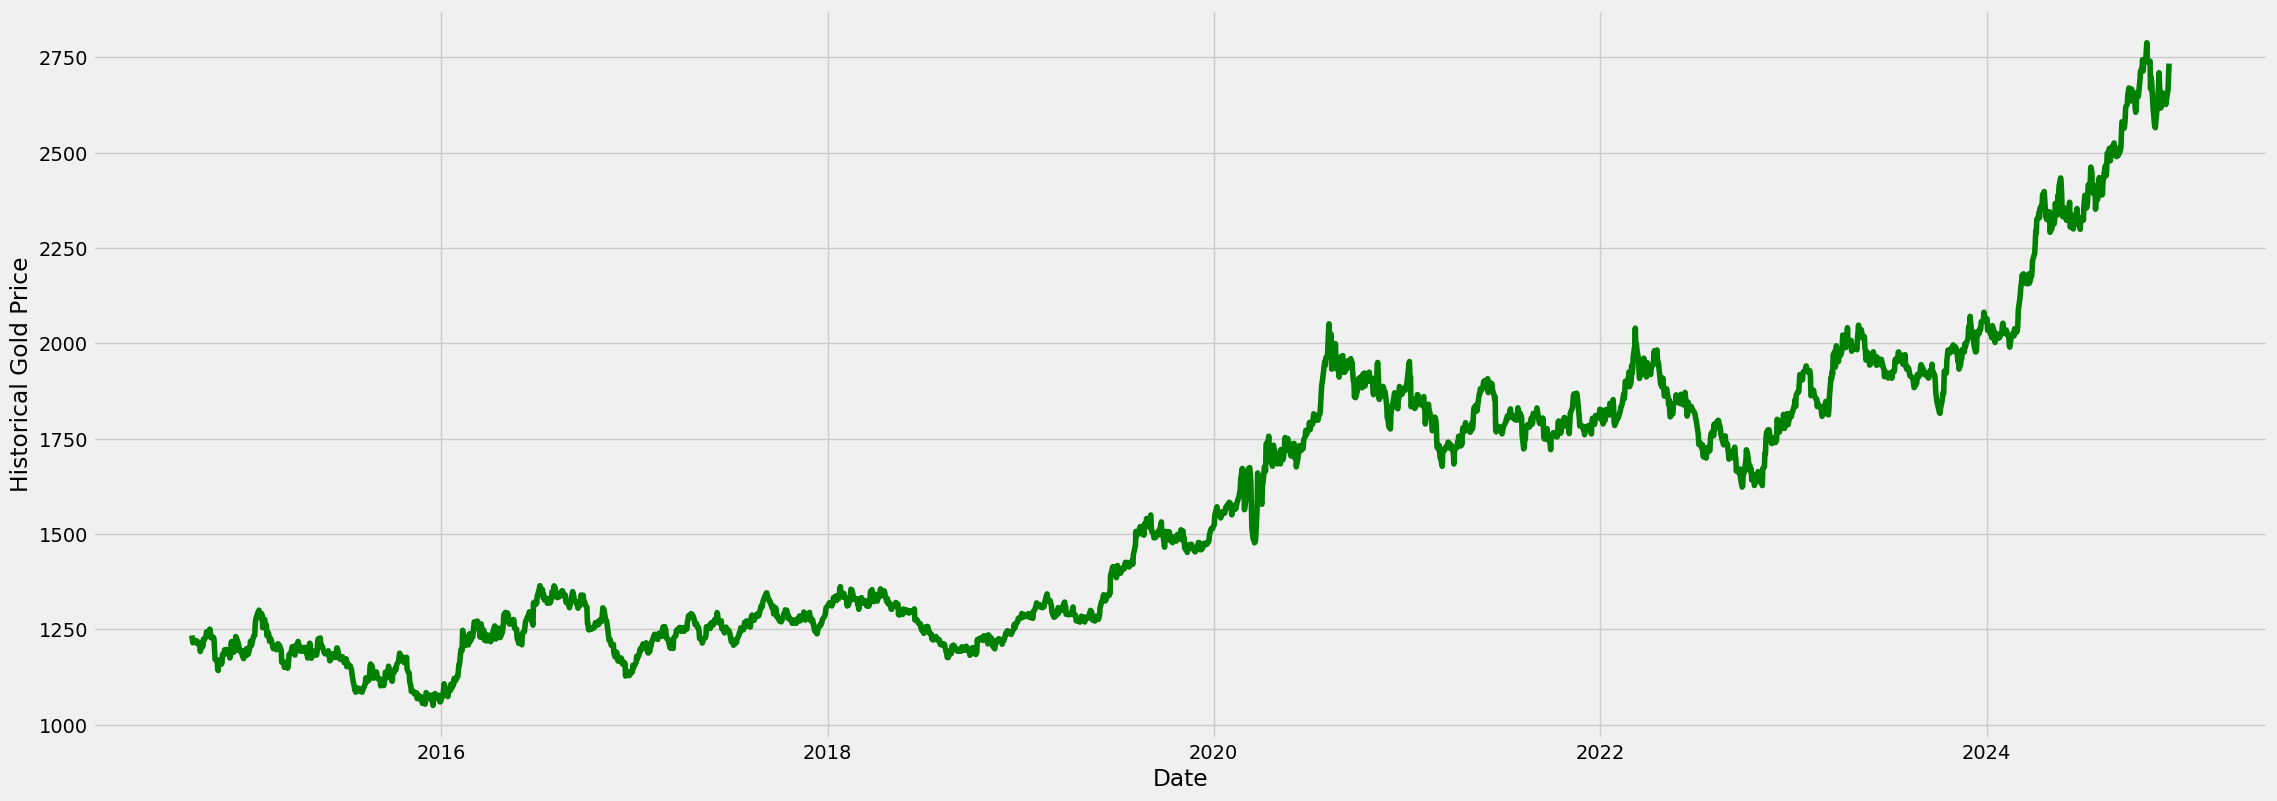

In [ ]:
#Plotting the gold price

plt.figure(figsize=(25,9))

plt.plot(final_data.index,final_data['Close_GC=F'], label= 'Close_GC=F',color ='green')
plt.xlabel('Date')
plt.ylabel('Historical Gold Price')
plt.show()

In [ ]:
#week_data = final_data.loc['2024-12-02':'2024-12-09']

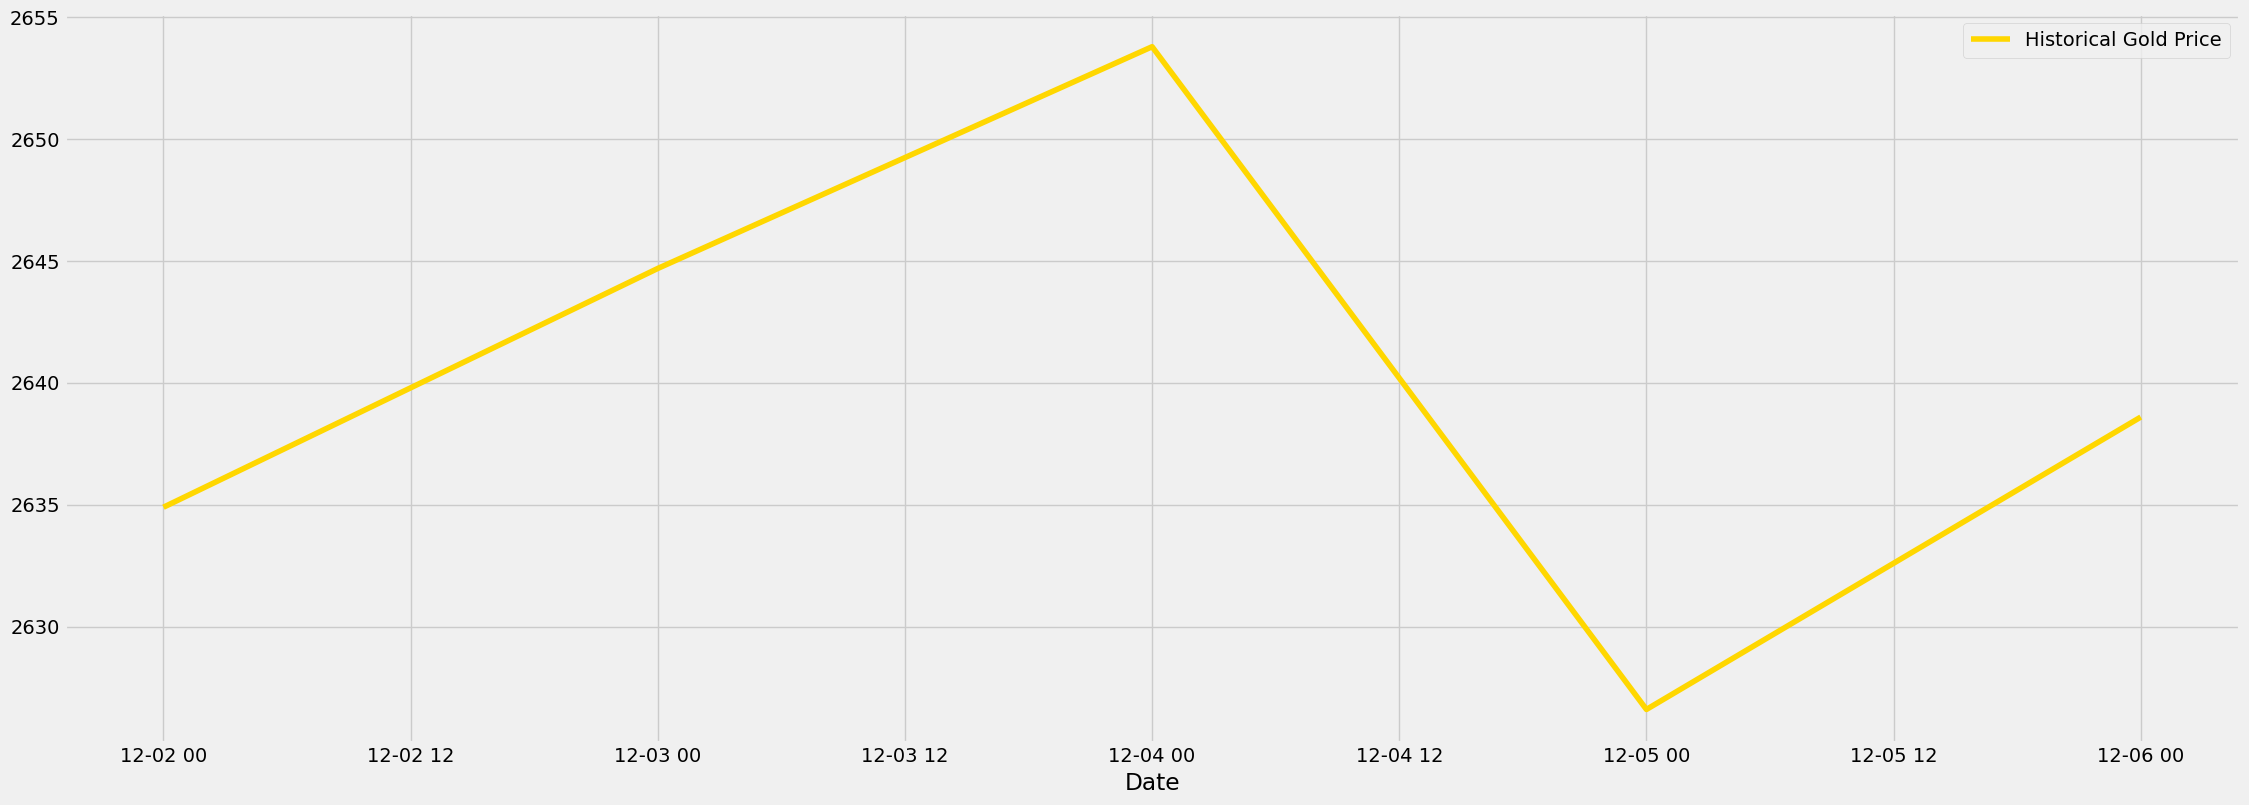

In [ ]:
plt.figure(figsize=(25,9))

date_range = final_data['2024-12-02':'2024-12-06']

plt.plot(date_range.index, date_range['Close_GC=F'],label="Historical Gold Price", color='gold')
plt.grid(True)

plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
advanced_decomposition = STL(final_data['Close_GC=F'], period=365).fit()

In [ ]:
final_data['Close_GC=F'].mean()

1586.7406359645129

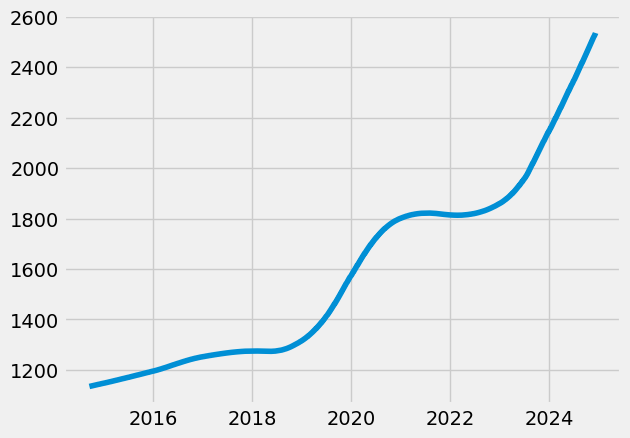

In [ ]:

plt.plot(advanced_decomposition.trend)
plt.show()

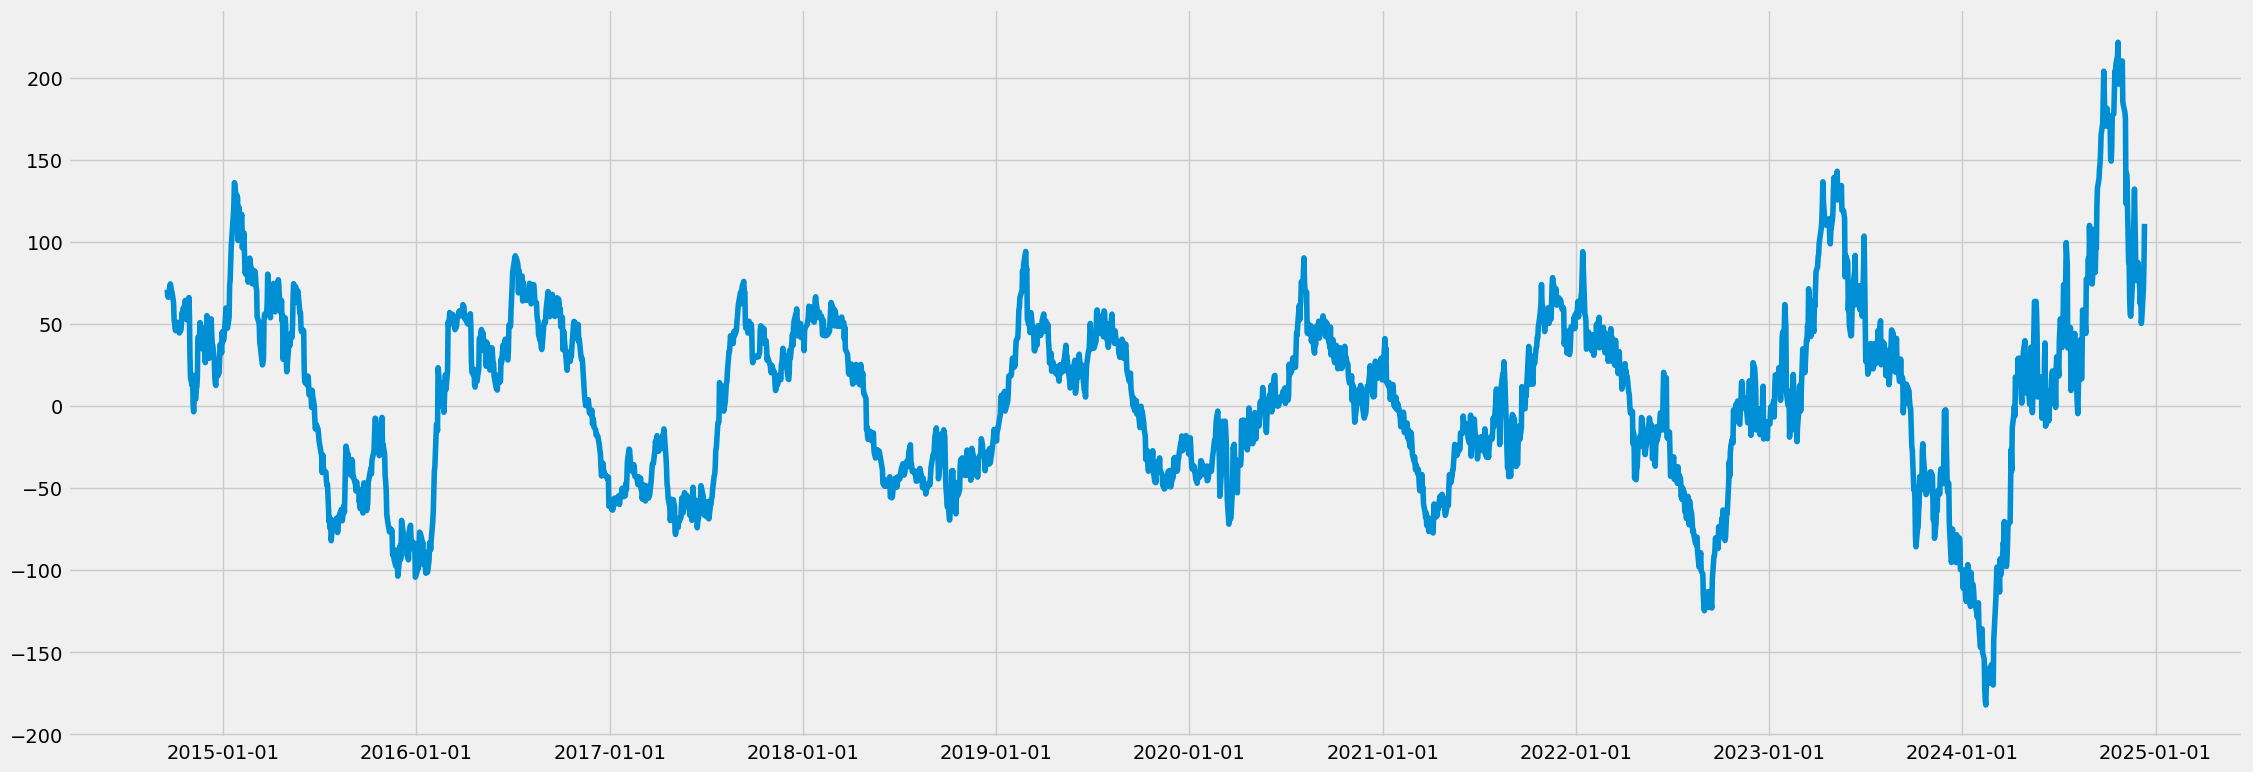

In [ ]:
plt.figure(figsize=(25,9))
plt.plot(advanced_decomposition.seasonal)
plt.xticks(['2015','2016','2017','2018','2019','2020','2021','2022','2023','2024','2025'])
plt.show()

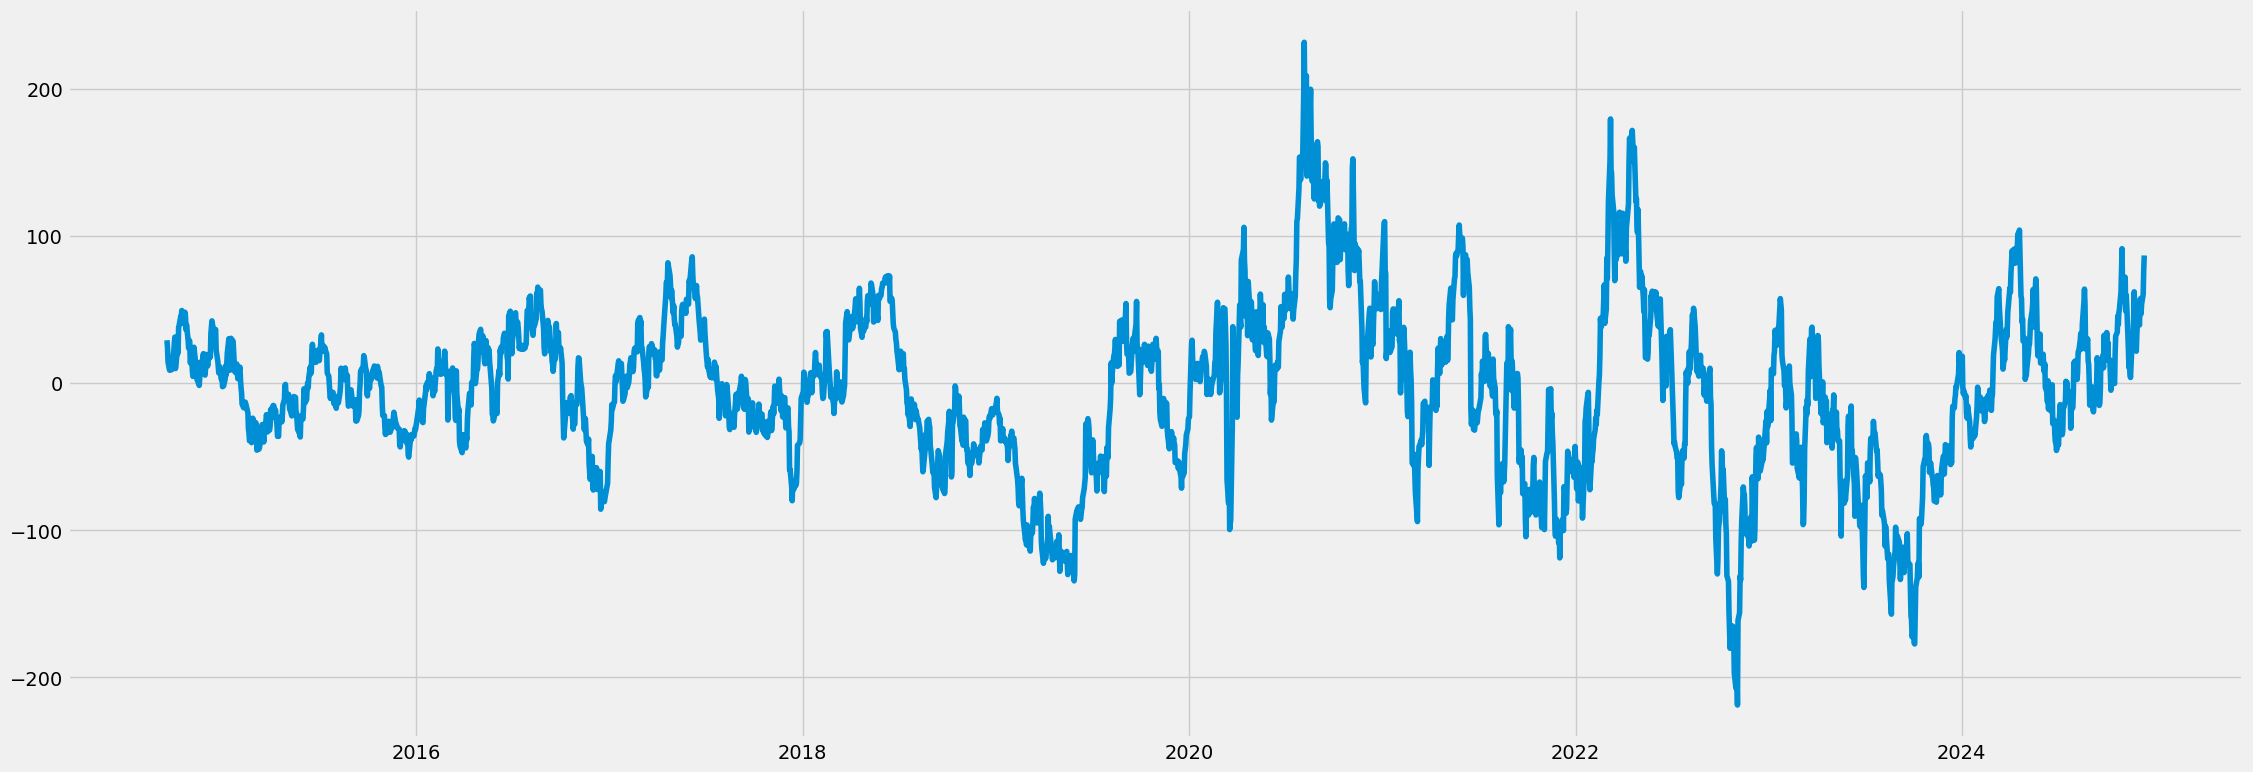

In [ ]:

plt.figure(figsize=(25,9))
plt.plot(advanced_decomposition.resid)
plt.show()

Traditional Model

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
#ADF test

adf_result1 = adfuller(final_data['Close_GC=F'])

In [ ]:
print(f'ADF-value:{adf_result1[0]}')
print(f'\np-value:{adf_result1[1]}')

ADF-value:1.0155907061394522

p-value:0.9944277549691336


In [ ]:
lag_1 = np.diff(final_data['Close_GC=F'], n=1)

In [ ]:
adf_result2 = adfuller(lag_1)
print(f'ADF-value:{adf_result2[0]}')
print(f'\np-value:{adf_result2[1]}')

ADF-value:-52.41131646333576

p-value:0.0


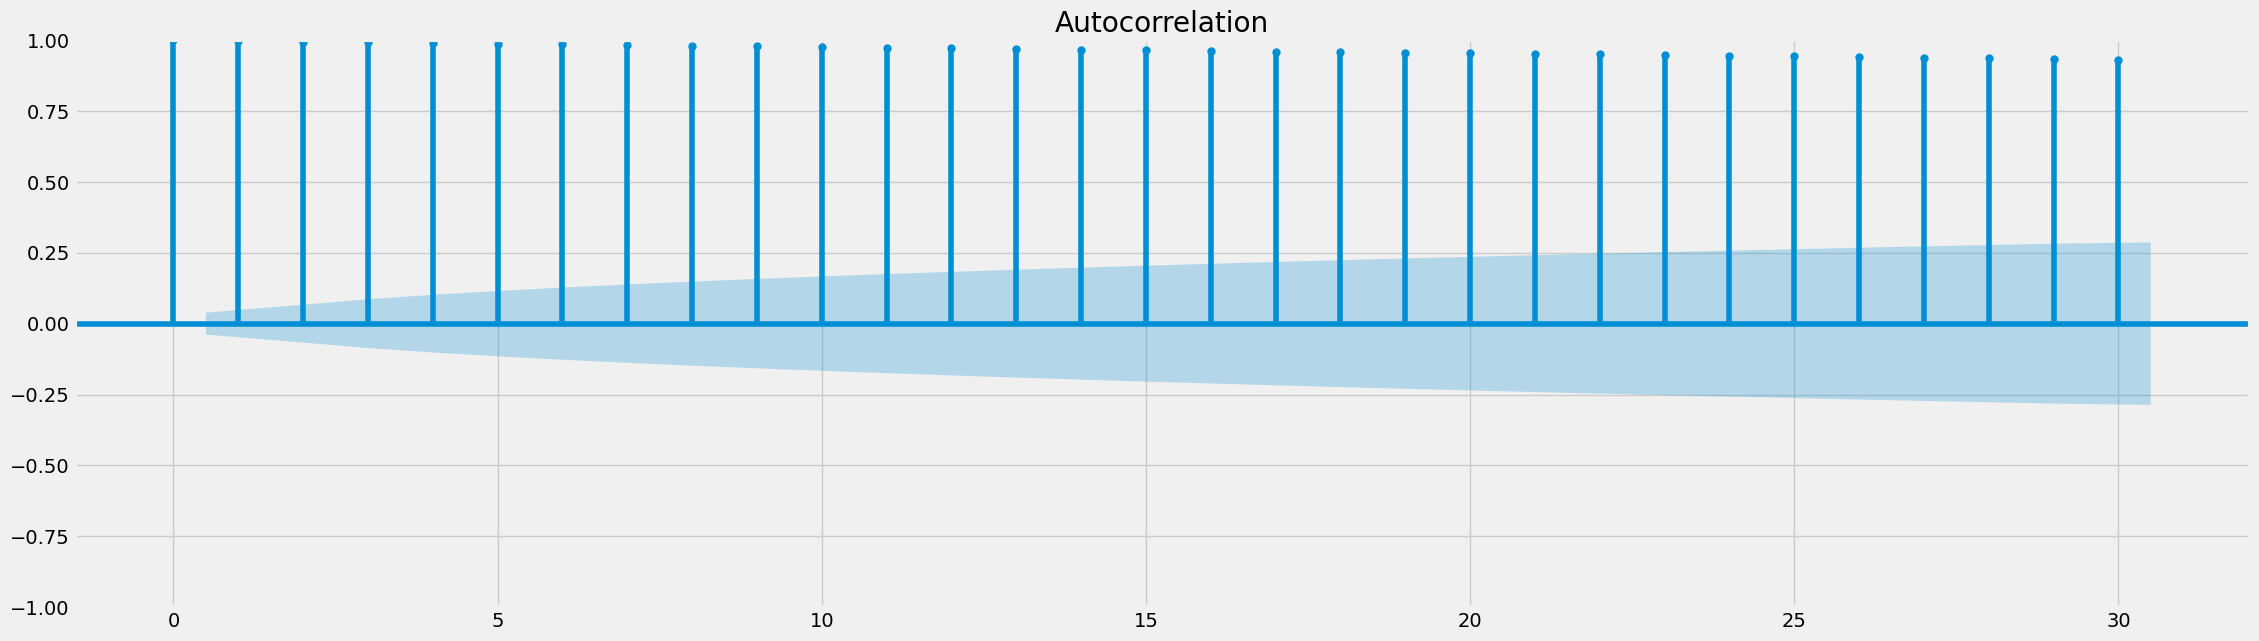

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(25,7))

plot_acf(final_data['Close_GC=F'],lags=30,ax=ax)
plt.show()



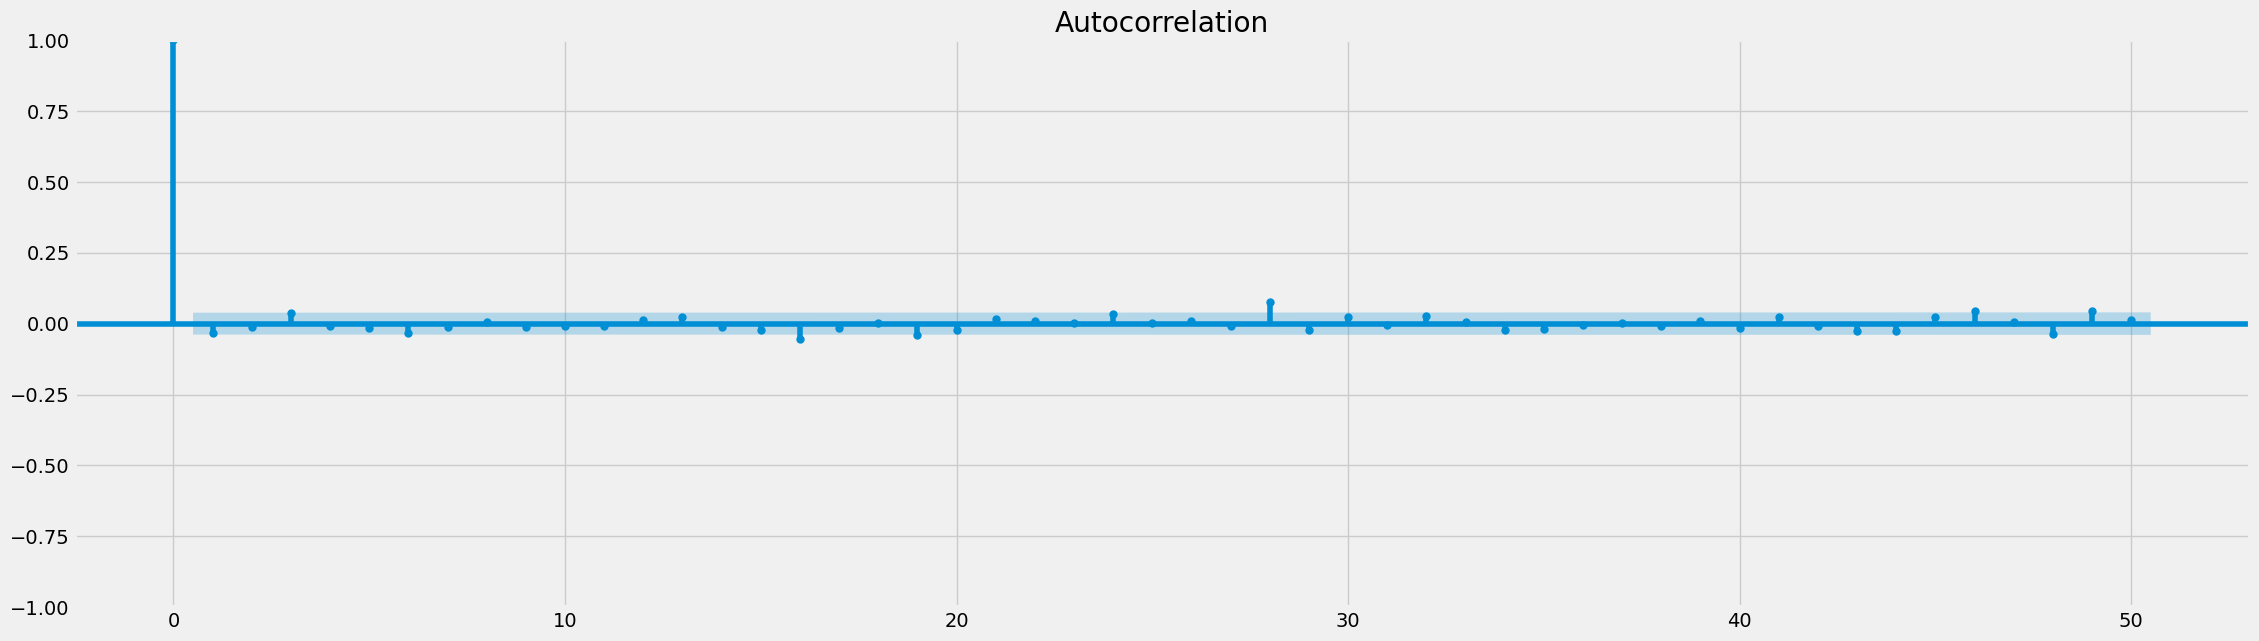

In [ ]:

fig, ax = plt.subplots(1,1,figsize=(25,7))
plot_acf(lag_1,lags=50, ax=ax)
plt.show()

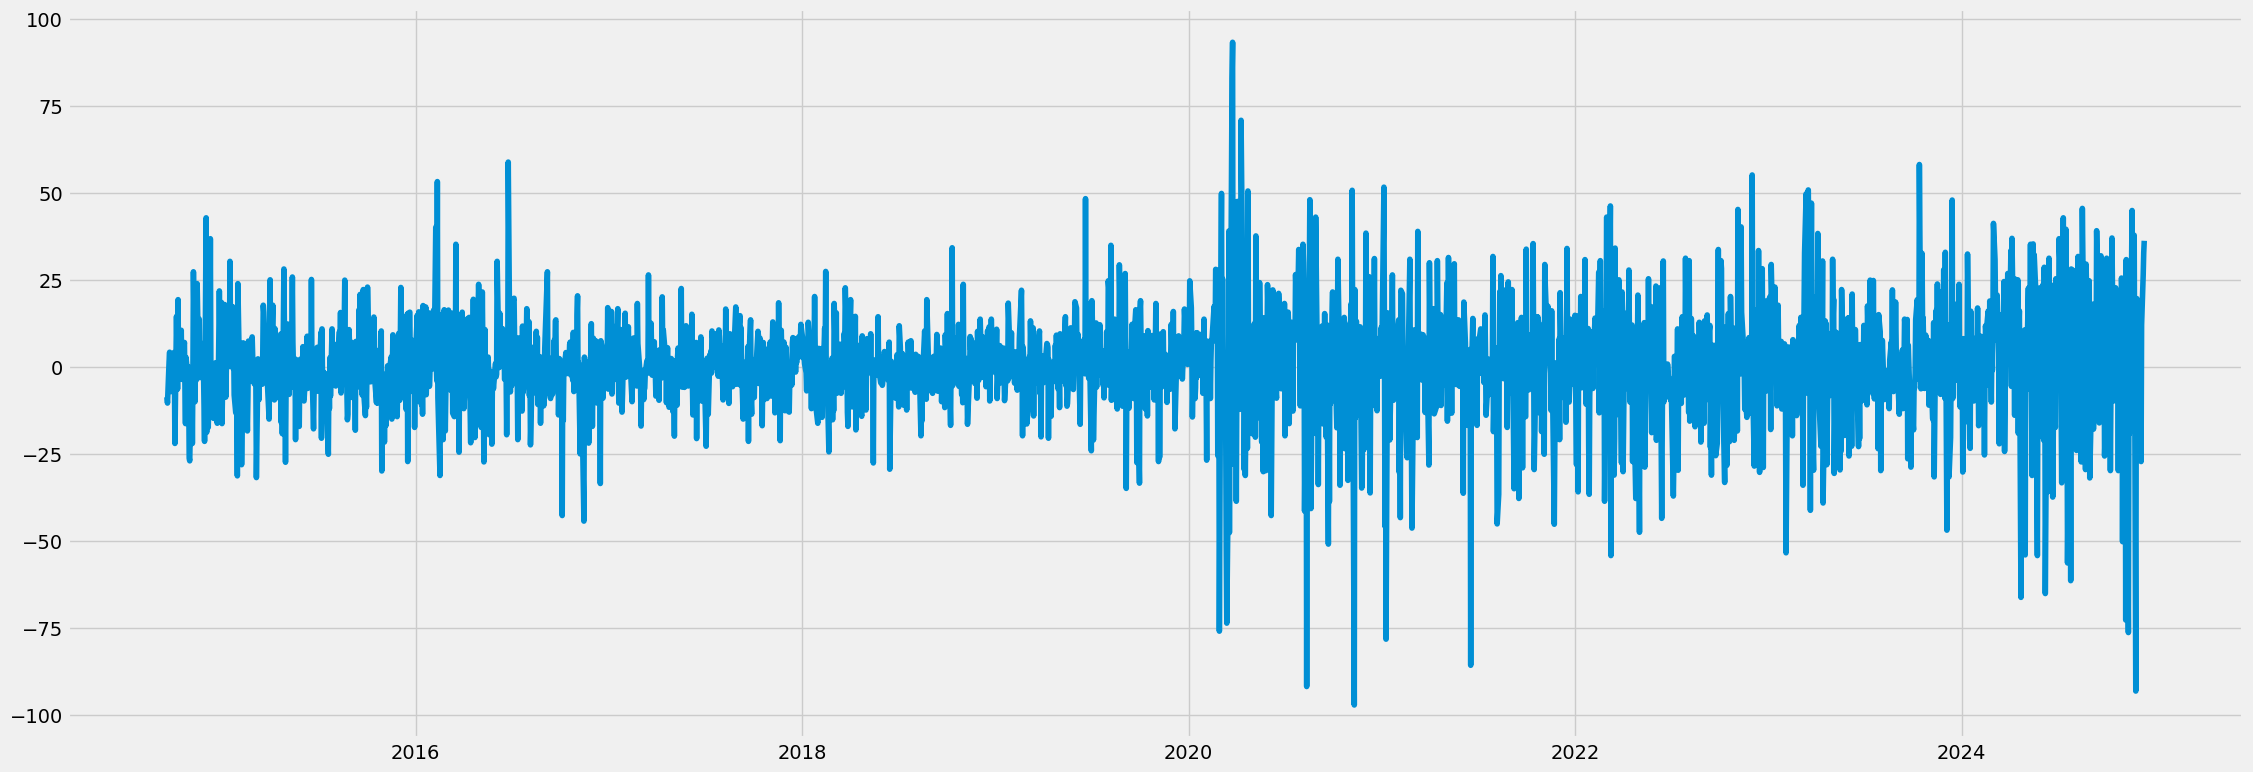

In [ ]:
plt.figure(figsize=(25,9))
plt.plot(final_data.iloc[1:].index,lag_1)
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
correlation_matrix = final_data.corr()

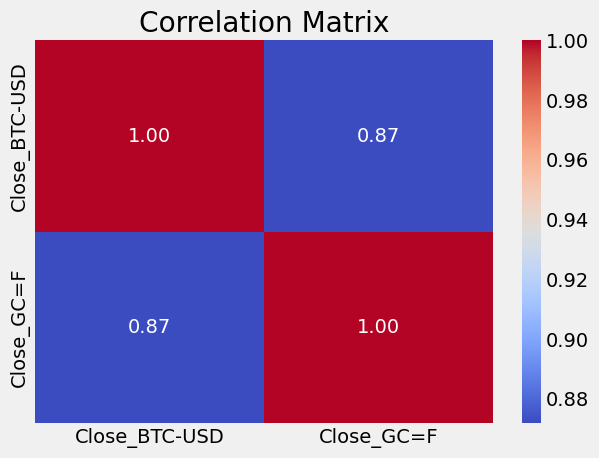

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
split_date = '2024-01-01'
df_training = final_data.loc[final_data.index <= split_date]
df_test = final_data.loc[final_data.index > split_date]
print(f"{len(df_training)} days of training data \n {len(df_test)} days of testing data ")

2335 days of training data 
 239 days of testing data 


In [ ]:
def perf_metrics(actual, predicted):

    rmse = round(np.sqrt(np.mean((actual - predicted)**2)),3)
    mape =  round(np.mean(np.abs((actual - predicted) / actual)) * 100,3)


    print(f"The rmse value is {rmse} and mape is {mape} %")


In [ ]:
def hor_date(df, n_periods):
    last_date = df.index[-1]
    future_date = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods, freq='B')
    return future_date

In [ ]:
def output(model, test_length, future_horizon):

    predicted_set = np.array(model.predict(n_periods=test_length))

    forecasted_set = np.array(model.predict(n_periods=test_length + horizon)[test_length:])

    return predicted_set, forecasted_set


Auto ARIMA model

In [ ]:
stepwise_fit = pm.auto_arima(df_training['Close_GC=F'], start_p=1, start_q=1, max_p=3, max_q=3, m=5,
                             start_P=0, seasonal=True, d=1, D=1, trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[5]             : AIC=inf, Time=9.58 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=20729.669, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=20061.851, Time=1.77 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=4.79 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=20731.480, Time=0.23 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=19823.737, Time=4.30 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=4.92 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=2.65 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=19822.158, Time=0.61 sec
 ARIMA(0,1,0)(1,1,0)[5]             : AIC=20060.344, Time=0.26 sec
 ARIMA(0,1,0)(2,1,1)[5]             : AIC=inf, Time=5.46 sec
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=1.80 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=19823.724, Time=0.65 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=inf, Time=5.04 sec
 ARIMA(0,1,0)(2,1,0)[5] intercept   : AIC=19824.154, Time=0.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 2335
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 5)   Log Likelihood               -9908.079
Date:                           Sun, 29 Dec 2024   AIC                          19822.158
Time:                                   04:35:52   BIC                          19839.417
Sample:                                        0   HQIC                         19828.447
                                          - 2335                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5       -0.6581      0.015    -44.633      0.000      -0.687      -0.629
ar.S.L10      -0.3137      0.014    -23.201      0.000      -0.340      -0.287
sigma2       289.8851      4.974     58.286      0.000     280.137     299.633
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):              1583.08
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               2.39   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

***Issue while running the model with annual seasonality, resource constraint so limited with the m = 5 seasonality.***

In [ ]:
horizon = 30

In [ ]:
arima_pred,arima_forecast = output(stepwise_fit, len(df_test), horizon)

In [ ]:
future_date = hor_date(final_data, horizon)

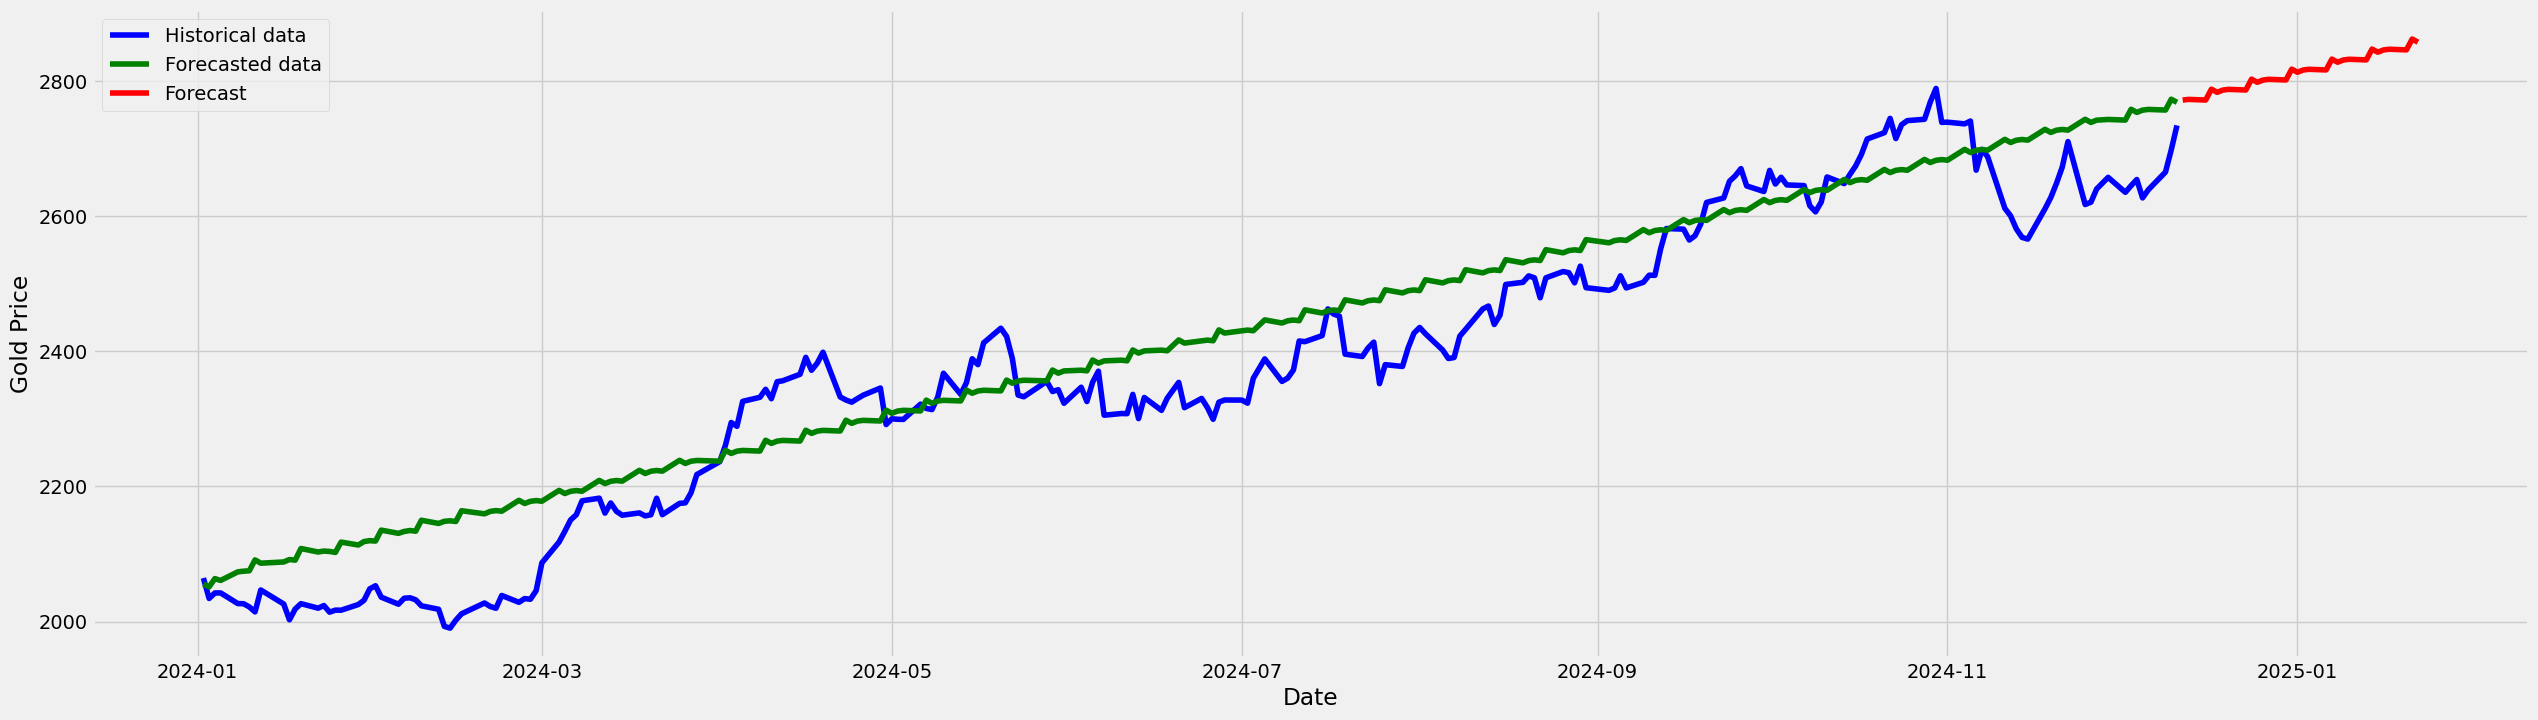

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(28,8))

plt.plot(df_test.index, df_test['Close_GC=F'], label='Historical data', color='blue')
plt.plot(df_test.index, arima_pred, label='Forecasted data', color='green')
plt.plot(future_date, arima_forecast, label='Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()
plt.savefig('ARIMA.png', dpi=300)

In [ ]:
perf_metrics(df_test['Close_GC=F'], arima_pred)

The rmse value is 74.35 and mape is 2.747 %


**With the introduction of Bitcoin only as an exogenous variable.**

In [ ]:
inc_exog = pm.auto_arima(final_data['Close_GC=F'], exogenous = final_data['Close_BTC-USD'], m = 5,
                       max_order = None, max_p = 5, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample = int(len(final_data)*0.2))

#oob, out of bag criteria, uses cv errors and out_of_sample parameter for the validation

In [ ]:
length = horizon + len(df_test)
arimax_set = inc_exog.predict(n_periods=length, exogenous = final_data['Close_BTC-USD'][-length:])



In [ ]:
arimax_pred = np.array(arimax_set[:len(df_test)])

arimax_forecast = arimax_set[len(df_test):]

In [ ]:
perf_metrics(np.array(df_test['Close_GC=F']), arimax_pred)

The rmse value is 554.484 and mape is 23.441 %


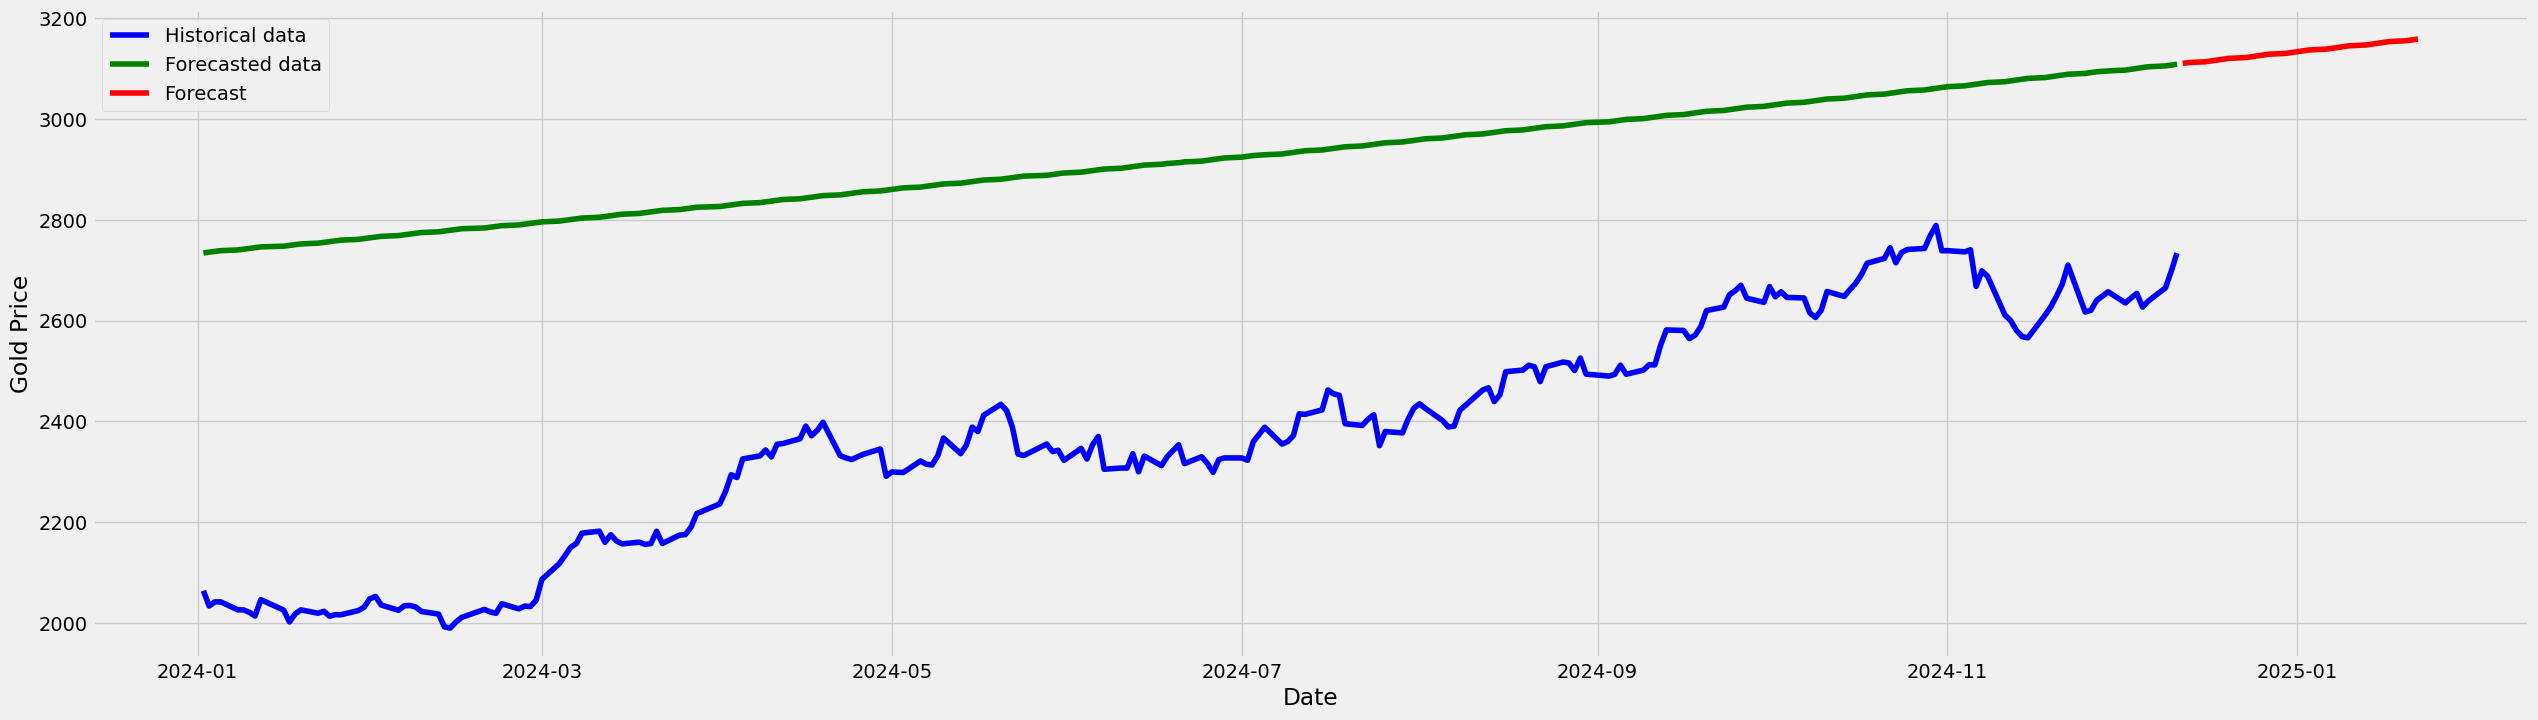

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(28,8))

plt.plot(df_test.index, df_test['Close_GC=F'], label='Historical data', color='blue')

plt.plot(df_test.index, arimax_pred, label='Forecasted data', color='green')

plt.plot(future_date, arimax_forecast, label='Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()
plt.savefig('ARIMAx.png', dpi=300)


**Prophet Model for forecasting, better for the longer horizon forecast**

In [ ]:
from prophet import Prophet

In [ ]:

# Prophet requires specific DataFrame format
prop_df = pd.DataFrame({
    'ds': df_training.index,  # datetime column
    'y': df_training['Close_GC=F']   # target variable
})


In [ ]:
model = Prophet(
    changepoint_prior_scale=0.05,
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality='auto',
    daily_seasonality=False,
)

In [ ]:
model.add_seasonality(
    name='yearly_business',
    period=252,  # 252 business days in a year
    fourier_order=20,  # Higher order for more flexible seasonality
)


In [ ]:
model.fit(prop_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2v01o8lf/2bctgdgb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2v01o8lf/bsk7cmin.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79738', 'data', 'file=/tmp/tmp2v01o8lf/2bctgdgb.json', 'init=/tmp/tmp2v01o8lf/bsk7cmin.json', 'output', 'file=/tmp/tmp2v01o8lf/prophet_modelm79pek0m/prophet_model-20241229043612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:36:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:36:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=len(df_test) + 30, freq='B')

In [ ]:
pred = model.predict(future)

In [ ]:
pred.shape

(2604, 22)

In [ ]:
proph_set = pred[['ds', 'yhat']]

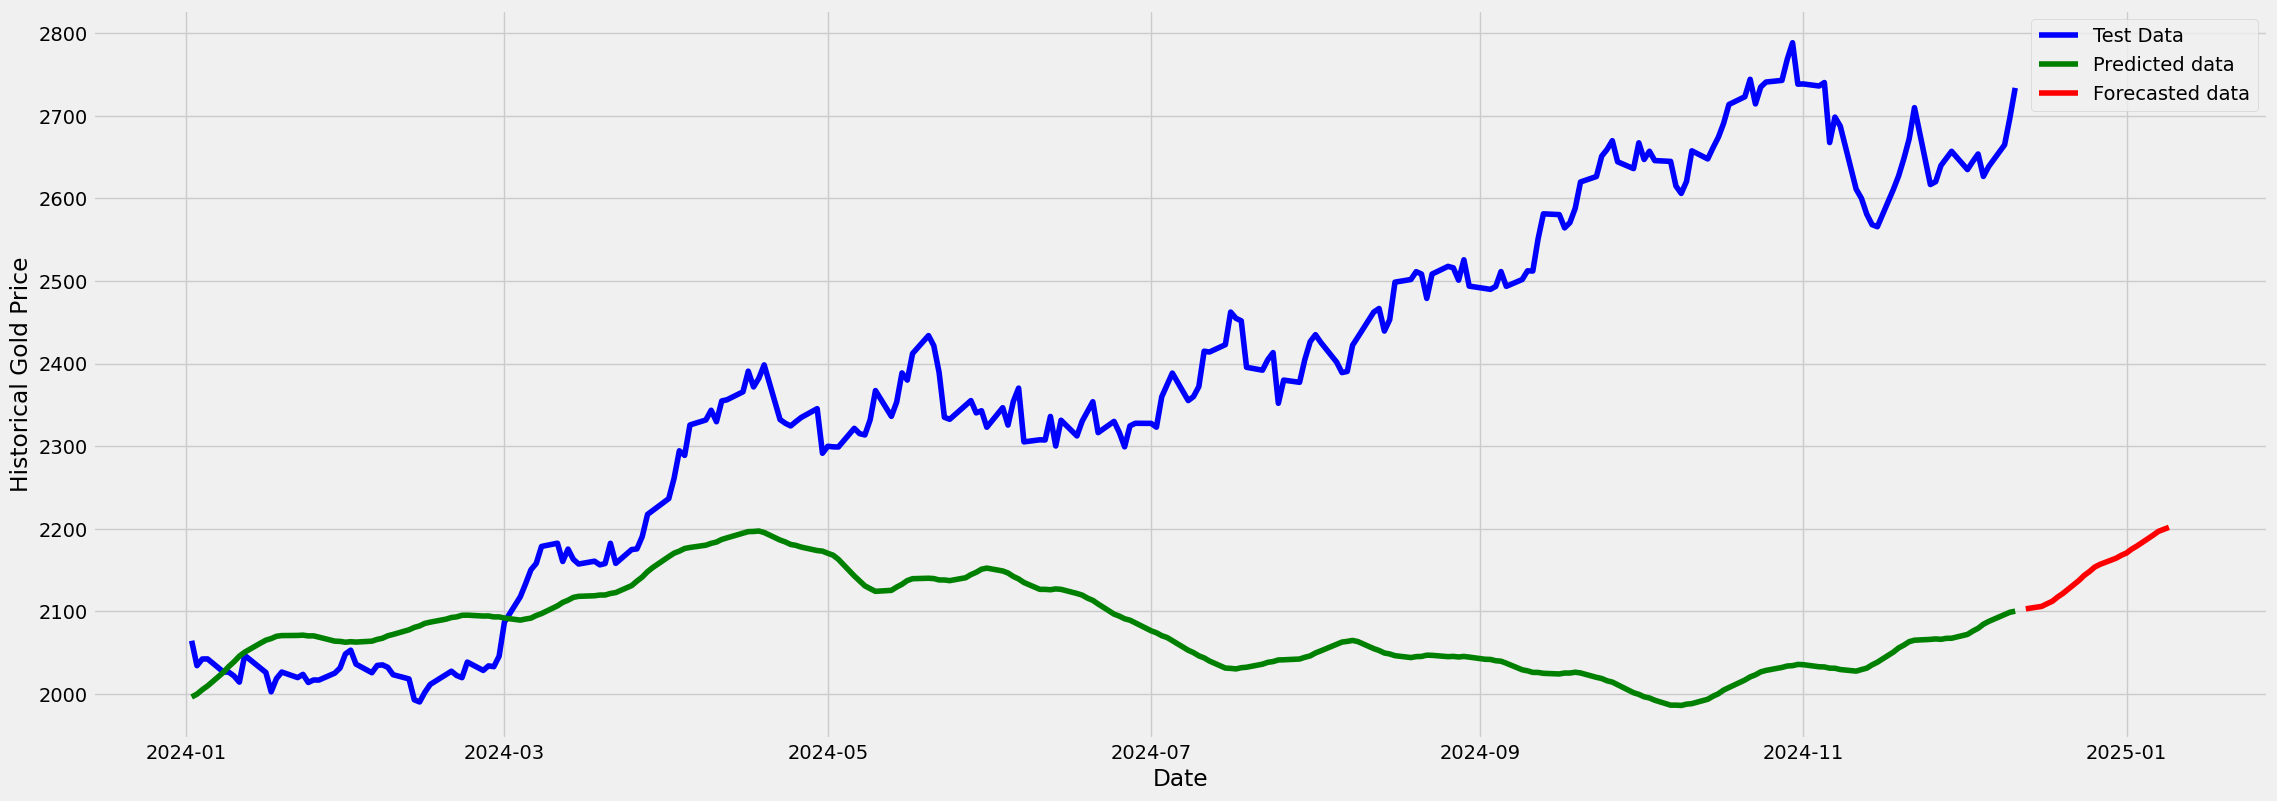

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(25,9))



plt.plot(df_test.index, df_test['Close_GC=F'], label= 'Test Data',color ='blue')

plt.plot( proph_set['ds'].loc[(proph_set['ds'] > '2024-01-01') & (proph_set['ds'] < '2024-12-12')], proph_set['yhat'].loc[(proph_set['ds'] > '2024-01-01') & (proph_set['ds'] < '2024-12-12')], label='Predicted data', color='green')


plt.plot(proph_set['ds'].loc[proph_set['ds'] > '2024-12-12'], proph_set['yhat'].loc[proph_set['ds'] > '2024-12-12'], label='Forecasted data', color='red')



plt.xlabel('Date')
plt.ylabel('Historical Gold Price')
plt.legend()
plt.show()
plt.savefig('Prophet_model.png', dpi=300)



In [ ]:
proph_pred = proph_set[len(df_training):len(df_training)+len(df_test)]

arimax_forecast = proph_set[len(df_training)+len(df_test):]

In [ ]:
perf_metrics(np.array(df_test['Close_GC=F']), np.array(proph_pred['yhat']))

The rmse value is 388.503 and mape is 12.376 %
